# importing Libraries


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns


# Loding data

In [2]:
Data=pd.read_csv(r"C:\Users\Admin\Downloads\Heart_Dis.csv")

In [3]:
Data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
Data.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


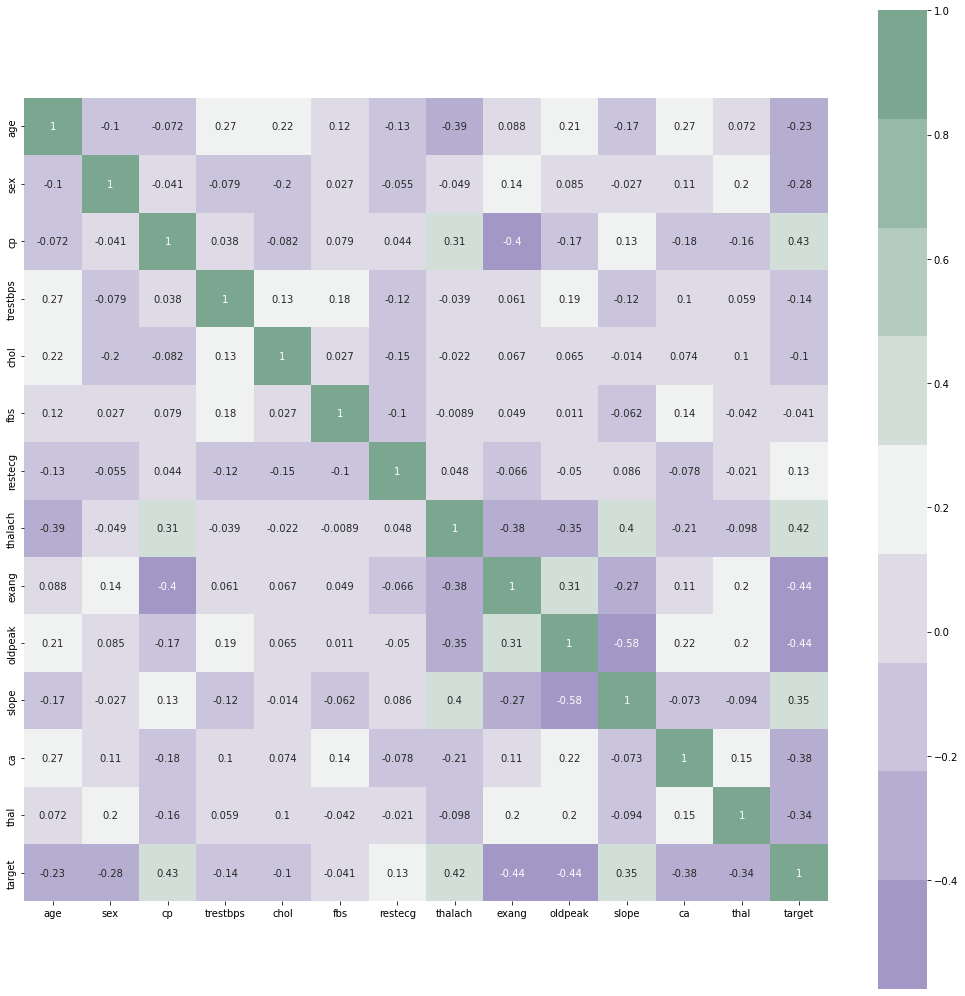

In [6]:
 #corelation matrix of all the features 
cmap=sns.diverging_palette(275,150,  s=40, l=65, n=9)
corrmat = Data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap=cmap,annot=True, square=True);

In [7]:
Data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
Data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [9]:
x=Data.iloc[:,:-1].values
y=Data.iloc[:,-1].values

In [10]:
print(x)

[[52.  1.  0. ...  2.  2.  3.]
 [53.  1.  0. ...  0.  0.  3.]
 [70.  1.  0. ...  0.  0.  3.]
 ...
 [47.  1.  0. ...  1.  1.  2.]
 [50.  0.  0. ...  2.  0.  2.]
 [54.  1.  0. ...  1.  1.  3.]]


In [11]:
print(y)

[0 0 0 ... 0 1 0]


In [12]:
Data.shape

(1025, 14)

In [13]:
Data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [14]:
#Data is imbalance

In [15]:
from imblearn.over_sampling import SMOTE
S=SMOTE()
x_data,y_data=S.fit_resample(x,y)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,random_state=0)

In [17]:
from collections import Counter

In [18]:
Counter(y_data)

Counter({0: 526, 1: 526})

In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [20]:
ann=tf.keras.models.Sequential()

In [21]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [22]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
history=ann.fit(x_train,y_train,batch_size=32,epochs=100,validation_split=0.2)

Epoch 1/100
21/21 [==============================] - 2s 23ms/step - loss: 0.6210 - accuracy: 0.6577 - val_loss: 0.6444 - val_accuracy: 0.6331
Epoch 2/100
21/21 [==============================] - 0s 6ms/step - loss: 0.5807 - accuracy: 0.7262 - val_loss: 0.6101 - val_accuracy: 0.7041
Epoch 3/100
21/21 [==============================] - 0s 5ms/step - loss: 0.5478 - accuracy: 0.7619 - val_loss: 0.5824 - val_accuracy: 0.7396
Epoch 4/100
21/21 [==============================] - 0s 5ms/step - loss: 0.5185 - accuracy: 0.7679 - val_loss: 0.5584 - val_accuracy: 0.7515
Epoch 5/100
21/21 [==============================] - 0s 7ms/step - loss: 0.4916 - accuracy: 0.7872 - val_loss: 0.5375 - val_accuracy: 0.7633
Epoch 6/100
21/21 [==============================] - 0s 5ms/step - loss: 0.4665 - accuracy: 0.8229 - val_loss: 0.5200 - val_accuracy: 0.7692
Epoch 7/100
21/21 [==============================] - 0s 5ms/step - loss: 0.4437 - accuracy: 0.8304 - val_loss: 0.5039 - val_accuracy: 0.7751
Epoch 8/100


Epoch 59/100
21/21 [==============================] - 0s 5ms/step - loss: 0.2496 - accuracy: 0.9062 - val_loss: 0.3957 - val_accuracy: 0.8284
Epoch 60/100
21/21 [==============================] - 0s 5ms/step - loss: 0.2484 - accuracy: 0.9077 - val_loss: 0.3948 - val_accuracy: 0.8343
Epoch 61/100
21/21 [==============================] - 0s 5ms/step - loss: 0.2472 - accuracy: 0.9092 - val_loss: 0.3923 - val_accuracy: 0.8343
Epoch 62/100
21/21 [==============================] - 0s 5ms/step - loss: 0.2461 - accuracy: 0.9107 - val_loss: 0.3918 - val_accuracy: 0.8284
Epoch 63/100
21/21 [==============================] - 0s 6ms/step - loss: 0.2447 - accuracy: 0.9077 - val_loss: 0.3907 - val_accuracy: 0.8284
Epoch 64/100
21/21 [==============================] - 0s 10ms/step - loss: 0.2441 - accuracy: 0.9137 - val_loss: 0.3902 - val_accuracy: 0.8343
Epoch 65/100
21/21 [==============================] - 0s 5ms/step - loss: 0.2424 - accuracy: 0.9107 - val_loss: 0.3887 - val_accuracy: 0.8284
Epoch

In [24]:
y_pred=ann.predict(x_test)
y_pred=(y_pred > 0.5)

print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

7/7 [==============================] - 0s 2ms/step
[[1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 

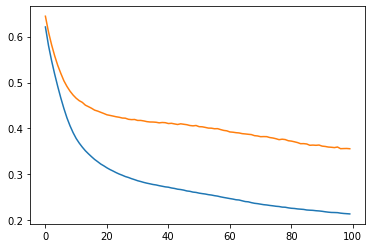

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

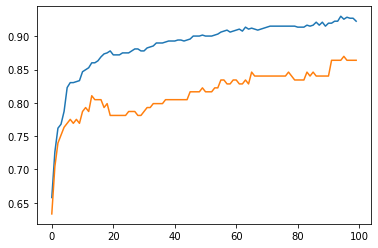

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])